# Importing Libraries

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score

# Importing dataset

In [2]:
df=pd.read_csv('Heart_Disease Decisiontrees.csv')

In [3]:
df.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Check for NULL values if any

In [5]:
df.isna().sum()

age                    0
gender                 0
chest_pain             0
rest_bps               0
cholestrol             0
fasting_blood_sugar    0
rest_ecg               0
thalach                0
exer_angina            0
old_peak               0
slope                  0
ca                     0
thalassemia            0
target                 0
dtype: int64

# Exploratory Data Analysis

In [6]:
#1. Information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


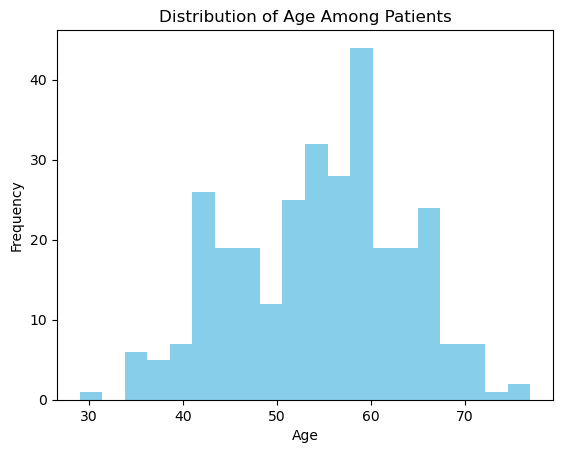

In [7]:
#2.What is the distribution of age among the patients?

# Histogram to visualize the distribution
plt.hist(df['age'], bins=20, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age Among Patients')
plt.show()


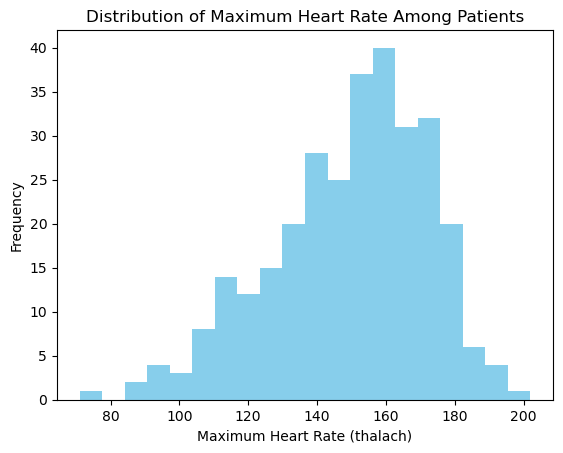

In [8]:
#3.How is the maximum heart rate (thalach) distributed among the patients?

# Histogram to visualize the distribution
plt.hist(df['thalach'], bins=20, color='skyblue')
plt.xlabel('Maximum Heart Rate (thalach)')
plt.ylabel('Frequency')
plt.title('Distribution of Maximum Heart Rate Among Patients')
plt.show()

In [9]:
#4.What is the prevalence of exercise-induced angina (exer_angina) in the dataset?

# Calculate the prevalence of exercise-induced angina
prevalence = df['exer_angina'].value_counts(normalize=True) * 100
# Print the output
print(prevalence)


0    67.326733
1    32.673267
Name: exer_angina, dtype: float64


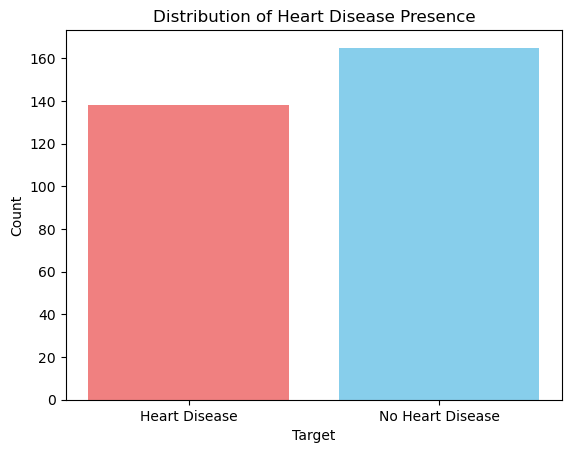

In [11]:
#5.What is the distribution of the target variable (heart disease presence) in the dataset?


# Count the occurrences of each target value
target_counts = df['target'].value_counts()

# Plot the distribution of the target variable
plt.bar(target_counts.index, target_counts.values, color=['skyblue', 'lightcoral'])
plt.xticks(target_counts.index, ['No Heart Disease', 'Heart Disease'])
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Distribution of Heart Disease Presence')
plt.show()




#  Model Building

In [12]:
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.20)


In [13]:
model = DecisionTreeClassifier(criterion='gini')
model.fit(X_train, y_train)


DecisionTreeClassifier()

In [14]:
pred_model=model.predict(X_test)

In [16]:
accuracy = accuracy_score(y_test, pred_model)
cm = confusion_matrix(y_test, pred_model)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", cm)


Accuracy: 0.8360655737704918
Confusion Matrix:
 [[27  2]
 [ 8 24]]


In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_model))


              precision    recall  f1-score   support

           0       0.77      0.93      0.84        29
           1       0.92      0.75      0.83        32

    accuracy                           0.84        61
   macro avg       0.85      0.84      0.84        61
weighted avg       0.85      0.84      0.84        61



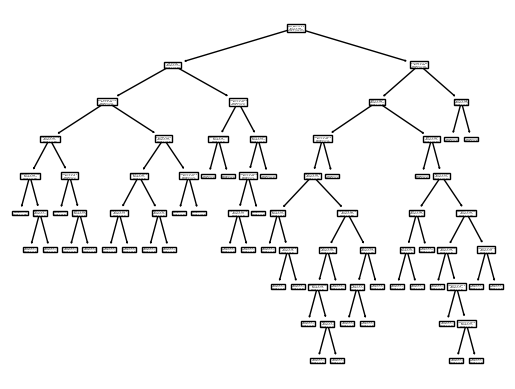

In [18]:
from sklearn import tree
tree.plot_tree(model,feature_names=X.columns)
plt.show()

In [19]:
ccp_alpha=model.cost_complexity_pruning_path(X_train,y_train)
ccp_alpha=ccp_alpha['ccp_alphas']

In [20]:
len(ccp_alpha)

25